# CHICAGO CRIME DATA ANALYSIS 

## Introduction : 

The "Crimes in Chicago" dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2012 to 2017, minus the most recent seven days. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. 

The dataset contains the following columns :

-  ID - Unique identifier for the record.

-  CASE NUMBER - The Chicago Police Department RD Number (Records Division Number), which is      unique to the incident.

-  DATE - Date when the incident occurred. this is sometimes a best estimate.

-  BLOCK - The partially redacted address where the incident occurred, placing it on the same    block as the actual address.

-  IUCR - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary      Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-    438e.

- PRIMARY TYPE - The primary description of the IUCR code.

- DESCRIPTION - The secondary description of the IUCR code, a subcategory of the primary         description.

- LOCATION DESCRIPTION - Description of the location where the incident occurred.

- ARREST - Indicates whether an arrest was made.

- DOMESTIC - Indicates whether the incident was domestic-related as defined by the Illinois     Domestic Violence Act.

- BEAT - Indicates the beat where the incident occurred. A beat is the smallest police           geographic area – each beat has a dedicated police beat car. Three to five beats make up a     police sector, and three sectors make up a police district. The Chicago Police Department     has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

- DISTRICT - Indicates the police district where the incident occurred. See the districts at     https://data.cityofchicago.org/d/fthy-xz3r.

- WARD - The ward (City Council district) where the incident occurred. See the wards at         https://data.cityofchicago.org/d/sp34-6z76.

- COMMUNITY AREA - Indicates the community area where the incident occurred. Chicago has 77     community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

- FBI CODE - Indicates the crime classification as outlined in the FBI's National Incident-     Based Reporting System (NIBRS). See the Chicago Police Department listing of these             classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

- X COORDINATE - The x coordinate of the location where the incident occurred in State Plane     Illinois East NAD 1983 projection. This location is shifted from the actual location for       partial redaction but falls on the same block.

- Y COORDINATE - The y coordinate of the location where the incident occurred in State Plane     Illinois East NAD 1983 projection. This location is shifted from the actual location for       partial redaction but falls on the same block.

- YEAR - Year the incident occurred.

- UPDATED ON - Date and time the record was last updated.

- LATITUDE - The latitude of the location where the incident occurred. This location is         shifted from the actual location for partial redaction but falls on the same block.

- LONGITUDE - The longitude of the location where the incident occurred. This location is       shifted from the actual location for partial redaction but falls on the same block.

- LOCATION - The location where the incident occurred in a format that allows for creation of   maps and other geographic operations on this data portal. This location is shifted from       the    actual location for partial redaction but falls on the same block.

Link to dataset : https://www.kaggle.com/currie32/crimes-in-chicago/downloads/crimes-in-chicago.zip/1



## Getting Started :

#### Importing all the libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pylab
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import statsmodels.api as sm


#graph inline
%matplotlib inline

### Data Extraction

We will use the 'pandas' library first in order to carry out data extraction and data preprocessing.

In [3]:
df = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


#### NOTE:  We are considering "Primary Type" as the target column

In [4]:
#Checking the columns
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [5]:
#checking the number of rows and columns
df.shape

(1456714, 23)

In [9]:
#checking the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
Unnamed: 0              1456714 non-null int64
ID                      1456714 non-null int64
Case Number             1456713 non-null object
Date                    1456714 non-null object
Block                   1456714 non-null object
IUCR                    1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Beat                    1456714 non-null int64
District                1456713 non-null float64
Ward                    1456700 non-null float64
Community Area          1456674 non-null float64
FBI Code                1456714 non-null object
X Coordinate            1419631 non-null float64
Y Coordinate            1419631 non-null float64
Year                    1

### Data Pre-processing

In [10]:
# Remove NaN Value (As Dataset is huge, the NaN row could be neglectable)  
df = df.dropna()

In [11]:
# As the dataset is too huge is size, we would just subsampled a dataset for modelling as proof of concept
df = df.sample(n=100000)

In [12]:
# Remove irrelevant/not meaningfull attributes
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1176000 to 1172027
Data columns (total 20 columns):
Date                    100000 non-null object
Block                   100000 non-null object
IUCR                    100000 non-null object
Primary Type            100000 non-null object
Description             100000 non-null object
Location Description    100000 non-null object
Arrest                  100000 non-null bool
Domestic                100000 non-null bool
Beat                    100000 non-null int64
District                100000 non-null float64
Ward                    100000 non-null float64
Community Area          100000 non-null float64
FBI Code                100000 non-null object
X Coordinate            100000 non-null float64
Y Coordinate            100000 non-null float64
Year                    100000 non-null int64
Updated On              100000 non-null object
Latitude                100000 non-null float64
Longitude               100000 non-n

In [13]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second
df['date2'] = pd.to_datetime(df['Date'])
df['Year'] = df['date2'].dt.year
df['Month'] = df['date2'].dt.month
df['Day'] = df['date2'].dt.day
df['Hour'] = df['date2'].dt.hour
df['Minute'] = df['date2'].dt.minute
df['Second'] = df['date2'].dt.second 
df = df.drop(['Date'], axis=1) 
df = df.drop(['date2'], axis=1) 
df = df.drop(['Updated On'], axis=1)
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
1176000,075XX S COLES AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,421,4.0,7.0,...,1855817.0,2015,41.759256,-87.558028,"(41.759256032, -87.558028247)",12,2,10,30,0
1169571,007XX N TRUMBULL AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),RESIDENTIAL YARD (FRONT/BACK),True,False,1121,11.0,27.0,...,1904755.0,2015,41.894494,-87.712626,"(41.894494496, -87.712625773)",11,23,15,10,0
636691,047XX S CICERO AVE,0890,THEFT,FROM BUILDING,RESTAURANT,True,False,815,8.0,23.0,...,1872875.0,2013,41.807168,-87.743143,"(41.80716827, -87.743142974)",9,24,20,0,0
1355599,028XX N MILWAUKEE AVE,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,1412,14.0,35.0,...,1918597.0,2016,41.932482,-87.713000,"(41.93248218, -87.712999968)",8,11,19,31,0
953952,014XX W 110TH PL,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,2234,22.0,34.0,...,1831476.0,2014,41.693085,-87.657451,"(41.693084507, -87.657451285)",11,17,19,0,0


In [14]:
# Convert Categorical Attributes to Numerical
df['Block'] = pd.factorize(df["Block"])[0]
df['IUCR'] = pd.factorize(df["IUCR"])[0]
df['Description'] = pd.factorize(df["Description"])[0]
df['Location Description'] = pd.factorize(df["Location Description"])[0]
df['FBI Code'] = pd.factorize(df["FBI Code"])[0]
df['Location'] = pd.factorize(df["Location"])[0]

In [15]:
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


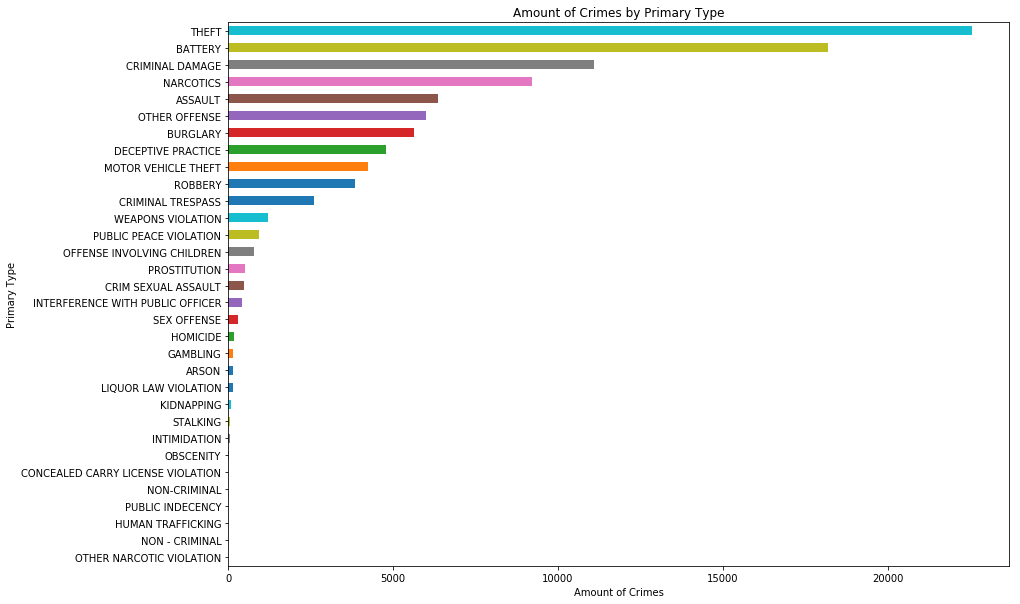

In [16]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [17]:
# At previous plot, we could see that the classes is quite imbalance
# Therefore, we are going to group several less occured Crime Type into 'Others' to reduce the Target Class amount

# First, we sum up the amount of Crime Type happened and select the last 13 classes
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
9,GAMBLING,159
0,ARSON,159
15,LIQUOR LAW VIOLATION,148
14,KIDNAPPING,73
29,STALKING,51
13,INTIMIDATION,43
20,OBSCENITY,15
4,CONCEALED CARRY LICENSE VIOLATION,6
19,NON-CRIMINAL,5
25,PUBLIC INDECENCY,4


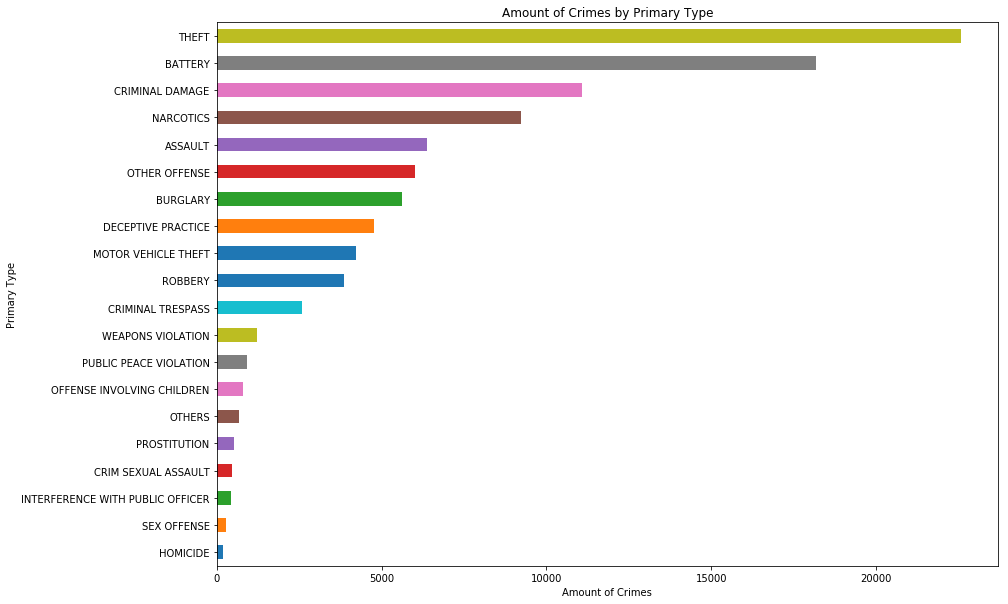

In [18]:
# After that, we replaced it with label 'OTHERS'
df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [19]:
# Now we are left with 14 Class as our predictive class
Classes = df['Primary Type'].unique()
Classes

array(['BURGLARY', 'NARCOTICS', 'THEFT', 'DECEPTIVE PRACTICE', 'ROBBERY',
       'CRIMINAL DAMAGE', 'BATTERY', 'ASSAULT', 'WEAPONS VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL TRESPASS', 'OTHER OFFENSE',
       'MOTOR VEHICLE THEFT', 'INTERFERENCE WITH PUBLIC OFFICER',
       'PROSTITUTION', 'PUBLIC PEACE VIOLATION', 'SEX OFFENSE',
       'CRIM SEXUAL ASSAULT', 'OTHERS', 'HOMICIDE'], dtype=object)

In [20]:
#Encode target labels into categorical variables:
df['Primary Type'] = pd.factorize(df["Primary Type"])[0] 
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

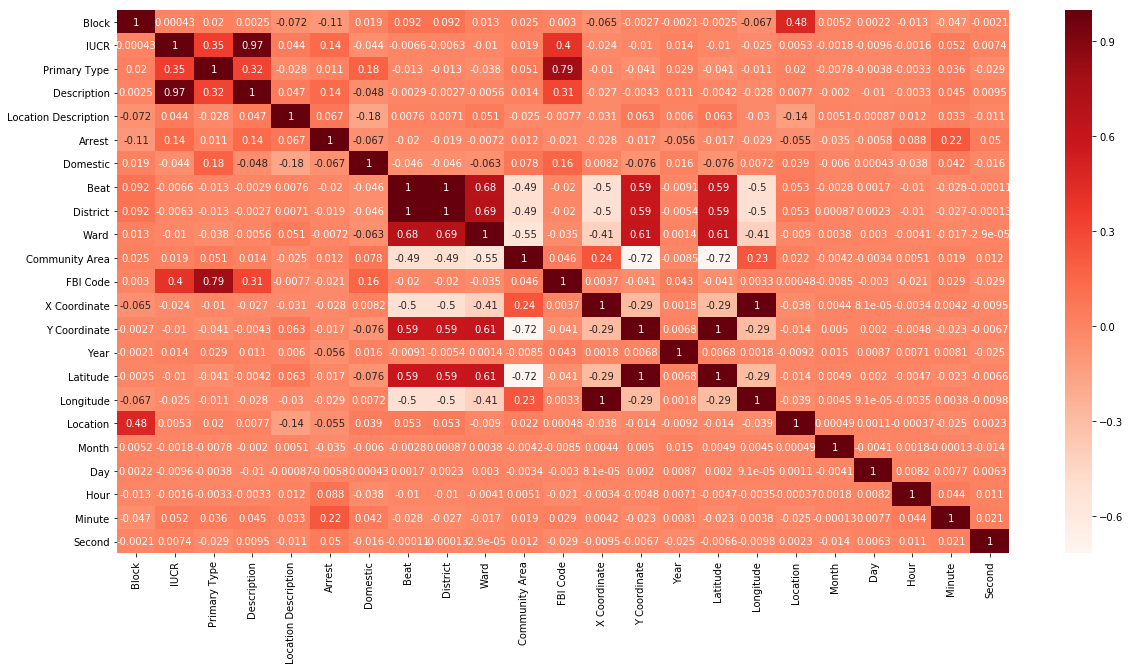

In [21]:
# Feature Selection using Filter Method 
# Split Dataframe to target class and features
X_fs = df.drop(['Primary Type'], axis=1)
Y_fs = df['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Summary :

The correlation coefficient has values between -1 to 1

A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

A value closer to 1 implies stronger positive correlation

A value closer to -1 implies stronger negative correlation

### Feature selection

In [22]:
#Correlation with output variable
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR            0.347411
Primary Type    1.000000
Description     0.320190
FBI Code        0.792485
Name: Primary Type, dtype: float64

In [23]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = ["IUCR", "Description", "FBI Code"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code']


### Splitting the data into train and test set.

In [46]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x_train = x[Features]    #Features to train
y_train = x[Target]      #Target Class to train
x_test = y[Features]    #Features to test
y_test = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Description', 'FBI Code']
Target Class        :  Primary Type
Training Set Size   :  (80000, 23)
Test Set Size       :  (20000, 23)


### Data Modelling :

1. The very first classifier that we will be using is the Random Forest Classifier.

Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

This works well because a single decision tree may be prone to a noise, but aggregate of many decision trees reduce the effect of noise giving more accurate results.

In [26]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x_train,
             y=y_train)

# Prediction
result = rf_model.predict(y[Features])

In [43]:
# Model Evaluation
ac_sc = accuracy_score(y_test, result)
rc_sc = recall_score(y_test, result, average="weighted")
pr_sc = precision_score(y_test, result, average="weighted")
f1_sc = f1_score(y_test, result, average='micro')
confusion_m = confusion_matrix(y_test, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  0.99935
Recall      :  0.99935
Precision   :  0.9993529954316175
F1 Score    :  0.99935
Confusion Matrix: 
[[1120    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0 1834    0    0    0    0    0    0    0    0    0    2    0    0
     0    0    0    0    0    0]
 [   0    0 4460    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0  943    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0  802    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0 2192    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0 3674    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1259    0    0    0    0    0    0
     0    0    0    0    0 

Summary : The accuracy of the model with random forest classifier implemented is 0.99 or 99%

In [31]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

================= Classification Report =================

                                  precision    recall  f1-score   support

                        BURGLARY       1.00      1.00      1.00      1120
                       NARCOTICS       1.00      1.00      1.00      1836
                           THEFT       1.00      1.00      1.00      4460
              DECEPTIVE PRACTICE       1.00      1.00      1.00       943
                         ROBBERY       1.00      1.00      1.00       802
                 CRIMINAL DAMAGE       1.00      1.00      1.00      2192
                         BATTERY       1.00      1.00      1.00      3674
                         ASSAULT       0.99      1.00      1.00      1259
               WEAPONS VIOLATION       1.00      1.00      1.00       243
      OFFENSE INVOLVING CHILDREN       0.99      0.89      0.94       152
               CRIMINAL TRESPASS       1.00      1.00      1.00       526
                   OTHER OFFENSE       0.98      1.0

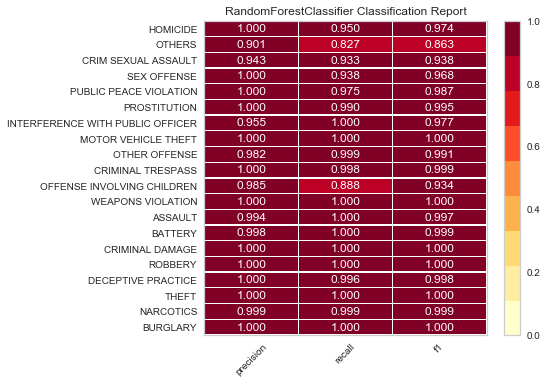

In [32]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x_train, y=y_train)     # Fit the training data to the visualizer
visualizer.score(x_test, y_test)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y_test, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

2. The second algorithm that we will use is the neural network algorithm.

Neural networks are one of the learning algorithms used within machine learning. They consist of different layers for analyzing and learning data. ... Neural Networks learn and attribute weights to the connections between the different neurons each time the network processes data.

In [33]:
# Neural Network
# Create Model with configuration 
nn_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         hidden_layer_sizes=(40,), 
                         random_state=1,
                         max_iter=1000                         
                        )

# Model Training
nn_model.fit(X=x_train,
             y=y_train)

# Prediction
result = nn_model.predict(y[Features]) 

In [34]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Neural Network Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Neural Network Results ==========
Accuracy    :  0.96495
Recall      :  0.96495
Precision   :  0.9701403614545303
F1 Score    :  0.96495
Confusion Matrix: 
[[1120    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0 1770    0   36    0    0    0    0    0    0    0   30    0    0
     0    0    0    0    0    0]
 [   0    0 4460    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0  812    0    0    0    0    0    0    0  127    0    0
     0    0    0    0    0    4]
 [   0    0    0    0  801    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0 2192    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0 3577   58    0   16    0    0    0    0
     9    0    1    2   11    0]
 [   0    0    0    0    0    0   10 1239    7    0    0    3    0    0
     0    0    0    0    0

================= Classification Report =================

                                  precision    recall  f1-score   support

                        BURGLARY       1.00      1.00      1.00      1120
                       NARCOTICS       1.00      0.96      0.98      1836
                           THEFT       1.00      1.00      1.00      4460
              DECEPTIVE PRACTICE       0.93      0.86      0.89       943
                         ROBBERY       1.00      1.00      1.00       802
                 CRIMINAL DAMAGE       1.00      1.00      1.00      2192
                         BATTERY       0.99      0.97      0.98      3674
                         ASSAULT       0.95      0.98      0.97      1259
               WEAPONS VIOLATION       0.97      0.92      0.95       243
      OFFENSE INVOLVING CHILDREN       0.84      0.54      0.66       152
               CRIMINAL TRESPASS       1.00      0.81      0.89       526
                   OTHER OFFENSE       0.76      0.9

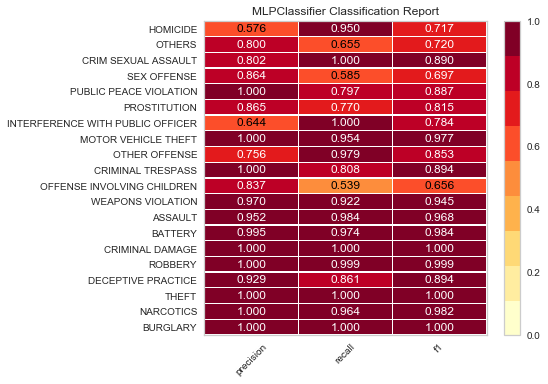

In [35]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(nn_model, classes=target_names)
visualizer.fit(X=x_train, y=y_train)     # Fit the training data to the visualizer
visualizer.score(x_test, y_test)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

3. Employing the K-nearest neighbour algorithm

In [36]:
# K-Nearest Neighbors
# Create Model with configuration 
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X=x_train,
             y=y_train)

# Prediction
result = knn_model.predict(y[Features]) 

In [37]:
# Model Evaluation
ac_sc = accuracy_score(y_test, result)
rc_sc = recall_score(y_test, result, average="weighted")
pr_sc = precision_score(y_test, result, average="weighted")
f1_sc = f1_score(y_test, result, average='micro')
confusion_m = confusion_matrix(y_test, result)

print("========== K-Nearest Neighbors Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== K-Nearest Neighbors Results ==========
Accuracy    :  0.99935
Recall      :  0.99935
Precision   :  0.9993529954316175
F1 Score    :  0.99935
Confusion Matrix: 
[[1120    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0 1834    0    0    0    0    0    0    0    0    0    2    0    0
     0    0    0    0    0    0]
 [   0    0 4460    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0  943    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0  802    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0 2192    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0 3674    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1259    0    0    0    0    0    0
     0    0    0    0

================= Classification Report =================

                                  precision    recall  f1-score   support

                        BURGLARY       1.00      1.00      1.00      1120
                       NARCOTICS       1.00      1.00      1.00      1836
                           THEFT       1.00      1.00      1.00      4460
              DECEPTIVE PRACTICE       1.00      1.00      1.00       943
                         ROBBERY       1.00      1.00      1.00       802
                 CRIMINAL DAMAGE       1.00      1.00      1.00      2192
                         BATTERY       1.00      1.00      1.00      3674
                         ASSAULT       1.00      1.00      1.00      1259
               WEAPONS VIOLATION       1.00      1.00      1.00       243
      OFFENSE INVOLVING CHILDREN       1.00      1.00      1.00       152
               CRIMINAL TRESPASS       1.00      1.00      1.00       526
                   OTHER OFFENSE       1.00      1.0

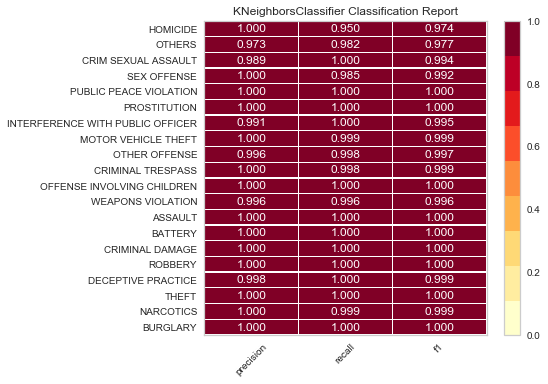

In [38]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(knn_model, classes=target_names)
visualizer.fit(X=x_train, y=y_train)     # Fit the training data to the visualizer
visualizer.score(x_test, y_test)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y_test, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

### Summary :

Looking at the three models above, one can predict the following about the three models,

The top 4 type of crimes which were most prevalent are as follows: 
1. BURGLARY
2. THEFT
3. ROBBERY
4. CRIMINAL DAMAGE


One can judge from the above accuracy scores of the three classifiers that have been employed to give the best predictions that the k-nearest-neighbours algorithm and the random forest classifier have the best accuracy score of 0.99935 i.e 99.935%. Hence considering only kNN for hyper parameter tuning and checking the best accuracy score against respective n_neighbors values.

## Hyperparameter tuning :

Considering only k-nearest neighbours for hyper parameter tuning.

In [41]:
estimator_list = list()
accuracy_list =list()

for n in range (1,4): 
    knn_model = KNeighborsClassifier(n_neighbors=n)

    knn_model.fit(X=x_train,
             y=y_train)
    result = knn_model.predict(y[Features]) 
    accuracy = accuracy_score(y[Target],result)
    estimator_list.append(n)
    accuracy_list.append(accuracy)

In [42]:
eval_df =  pd.DataFrame({"Num of estimators": estimator_list,"Valid accuracy Score": accuracy_list })
eval_df

,Num of estimators,Valid accuracy Score
0,1,0.99985
1,2,0.99960
2,3,0.99935


One can easily predict from the above table that when the n_neighbors value is equal to 1, the knn model gives the highest accuracy i.e 0.99985 which is nothing but 99.985%.

## Conclusion :

The top 4 types of crimes were predicted and the model accuracy was improved by carrying out the hyper parameter tuning.

## Contribution Statement :

The top 4 type of crimes were predicted by using 3 different classifiers such as Random forest Classifier, neural networks and k-nearest neighbours classifier and their respective accuracy_score, precision, recall and f1 scores were recorded.

A classification report was also generated for each of the classifier and was demonstrated in proper tabular format.

Hyper parameter tuning was done in order to test the best accuracy and accordingly decide on the best hyper parameter.

Code by self ----- 50%

Code by reference ----- 50%

## Citations : 

Information about different validation parameters of different models----- https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

Link to install YellowBrick package : https://anaconda.org/DistrictDataLabs/yellowbrick

Information about neural networks : https://chatbotsmagazine.com/machine-learning-neural-networks-and-algorithms-5c0711eb8f9a

Information about kNN : https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

Information about Random forest Classifier : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## License :

Copyright <2019> Ria Rajput Permission is hereby granted, free of charge, to any person obtaining a copy of this notebook and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.